In [5]:
import statsmodels.stats.proportion as smp

# Example single accuracy measurement
accuracy = 0.7821  # Replace with your accuracy
n_predictions = 3855  # Replace with the number of predictions

# Calculate the confidence interval
confidence_level = 0.95
ci_low, ci_upp = smp.proportion_confint(accuracy * n_predictions, n_predictions, alpha=1-confidence_level, method='wilson')

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"95% Confidence Interval: ({ci_low * 100:.2f}%, {ci_upp * 100:.2f}%)")

Accuracy: 78.21%
95% Confidence Interval: (76.88%, 79.48%)


In [36]:
#amount of predictions
import numpy as np

prediction_amounts = []
for i in range(2500, 38000, 2500):
    prediction_amounts.append(i * 0.1)

# Convert the list to a NumPy array
prediction_amounts = np.array(prediction_amounts, dtype = np.int32)

print(prediction_amounts)


[ 250  500  750 1000 1250 1500 1750 2000 2250 2500 2750 3000 3250 3500
 3750]


In [27]:

import numpy as np
HD_accuracies = np.loadtxt("HD_accuracies.csv", delimiter=",", skiprows=1, dtype=np.float32)
SVM_accuracies = np.loadtxt("SVM_accuracies.csv", delimiter=",", skiprows=1, dtype=np.float32)
SVM_accuracies = np.round(SVM_accuracies * 100, 2)

print(SVM_accuracies)

[61.6  72.   76.67 80.4  81.76 81.6  82.17 82.35 83.47 84.28 84.25 84.67
 84.77 85.77 86.56]


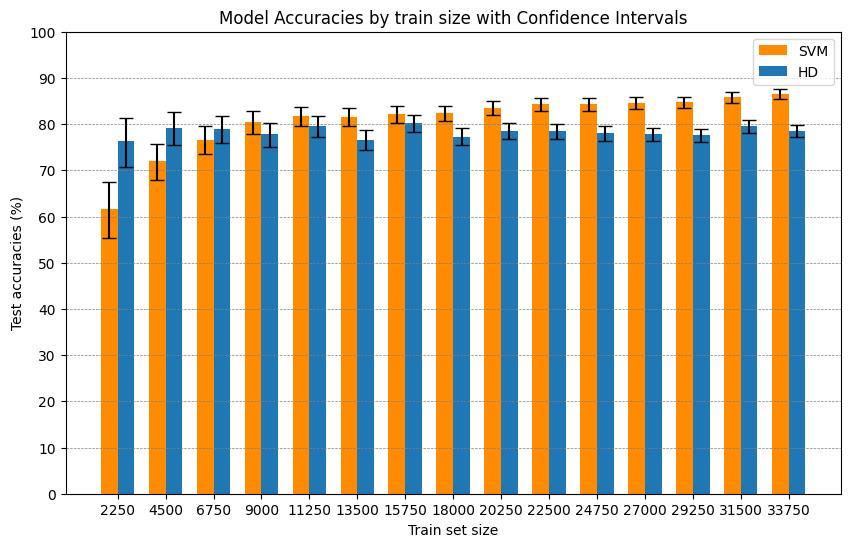

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.stats.proportion as smp
from matplotlib.ticker import MultipleLocator


# Load the data
HD_accuracies = np.loadtxt("HD_accuracies.csv", delimiter=",", skiprows=1, dtype=np.float32)
SVM_accuracies = np.loadtxt("SVM_accuracies.csv", delimiter=",", skiprows=1, dtype=np.float32)
SVM_accuracies = np.round(SVM_accuracies * 100, 2)

# Create the prediction amounts
prediction_amounts = np.array([i*0.1 for i in range(2500, 38000, 2500)], dtype=np.int32)
train_size = np.array([i*0.9 for i in range(2500, 38000, 2500)], dtype=np.int32)

# Function to calculate Wilson score confidence intervals
def wilson_confidence_interval(accuracy, n_predictions, confidence_level=0.95):
    ci_low, ci_upp = smp.proportion_confint(accuracy * n_predictions, n_predictions, alpha=1-confidence_level, method='wilson')
    return ci_low, ci_upp

# Calculate confidence intervals for SVM and HD accuracies
svm_conf_intervals = [wilson_confidence_interval(acc / 100, n_predictions) for acc, n_predictions in zip(SVM_accuracies, prediction_amounts)]
hd_conf_intervals = [wilson_confidence_interval(acc / 100, n_predictions) for acc, n_predictions in zip(HD_accuracies, prediction_amounts)]

# Extract lower and upper bounds for error bars
svm_errors = np.array([[mean - lower * 100, upper * 100 - mean] for (lower, upper), mean in zip(svm_conf_intervals, SVM_accuracies)]).T
hd_errors = np.array([[mean - lower * 100, upper * 100 - mean] for (lower, upper), mean in zip(hd_conf_intervals, HD_accuracies)]).T

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(prediction_amounts))

bar1 = ax.bar(index, SVM_accuracies, bar_width, yerr=svm_errors, label='SVM', capsize=5, color = "darkorange")
bar2 = ax.bar(index + bar_width, HD_accuracies, bar_width, yerr=hd_errors, label='HD', capsize=5)

ax.set_xlabel('Train set size')
ax.set_ylabel('Test accuracies (%)')
ax.set_title('Model Accuracies by train size with Confidence Intervals')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(train_size)
ax.legend()

ax.yaxis.set_major_locator(MultipleLocator(10))
ax.grid(which='major', axis='y', linestyle='--', linewidth='0.5', color='gray')

# Set y-axis limit to 100
ax.set_ylim(0, 100)

plt.show()

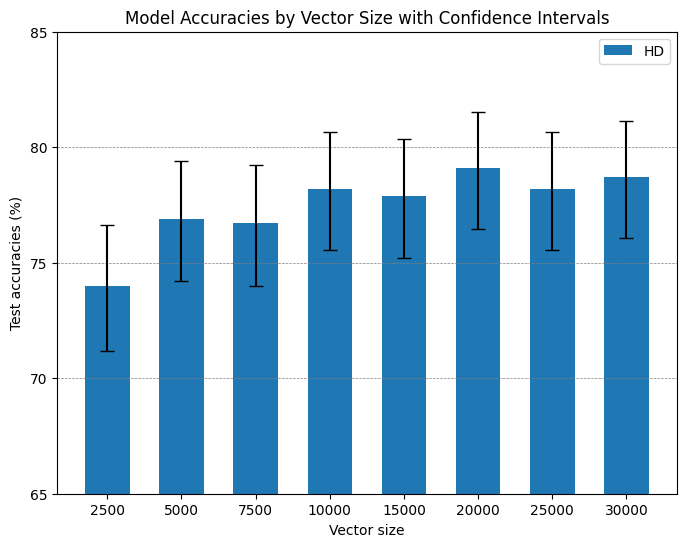

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.stats.proportion as smp
from matplotlib.ticker import MultipleLocator

# Load the data
HD_accuracies = np.loadtxt("HD_accuracies_over_size.csv", delimiter=",", skiprows=1, dtype=np.float32)

# Define vector sizes and number of predictions
vector_size = np.array([2500, 5000, 7500, 10000, 15000, 20000, 25000, 30000], dtype=np.int32)
n_predictions = 1000  # Constant for all vector sizes

# Function to calculate Wilson score confidence intervals
def wilson_confidence_interval(accuracy, n_predictions, confidence_level=0.95):
    ci_low, ci_upp = smp.proportion_confint(accuracy * n_predictions, n_predictions, alpha=1-confidence_level, method='wilson')
    return ci_low, ci_upp

# Calculate confidence intervals for HD accuracies
hd_conf_intervals = [wilson_confidence_interval(acc / 100, n_predictions) for acc in HD_accuracies]

# Extract lower and upper bounds for error bars
hd_errors = np.array([[mean - lower * 100, upper * 100 - mean] 
                      for (lower, upper), mean in zip(hd_conf_intervals, HD_accuracies)]).T

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))

bar_width = 0.6
index = np.arange(len(vector_size))

# Plot bar chart with error bars
bars = ax.bar(index, HD_accuracies, bar_width, yerr=hd_errors, label='HD', capsize=5)

ax.set_xlabel('Vector size')
ax.set_ylabel('Test accuracies (%)')
ax.set_title('Model Accuracies by Vector Size with Confidence Intervals')
ax.set_xticks(index)
ax.set_xticklabels(vector_size)
ax.legend()

# Add grid and set y-axis limits
ax.yaxis.set_major_locator(MultipleLocator(5))
ax.grid(which='major', axis='y', linestyle='--', linewidth=0.5, color='gray')
ax.set_ylim(65, 85)

# Display the plot
# plt.tight_layout()
plt.show()
